# TASK 3

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

### Importing and viewing dataset

In [2]:
data = pd.read_csv('C:\\Users\\LENOVO\\ PRODIGY\\Bankdata.csv')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

###  Converting categorical to numerical

In [7]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education','default','housing','loan', 'contact','month', 'poutcome','deposit'])


In [8]:
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [9]:
print(data.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit_no', 'deposit_yes'],
      dtype='object')


### Split the data into training and testing sets

In [10]:
feature=  data.drop('deposit_yes', axis=1)
target= data['deposit_yes']

### Training and evaluating the decision tree classifier

In [11]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=32)

In [12]:
decisiontree = DecisionTreeClassifier(random_state=32, max_depth=None)

In [13]:
decisiontree.fit(feature_train, target_train)

DecisionTreeClassifier(random_state=32)

In [14]:
target_pred = decisiontree.predict(feature_test)
print("ROC AUC score:", roc_auc_score(target_test, target_pred))

ROC AUC score: 1.0


### Visualizing the decision tree

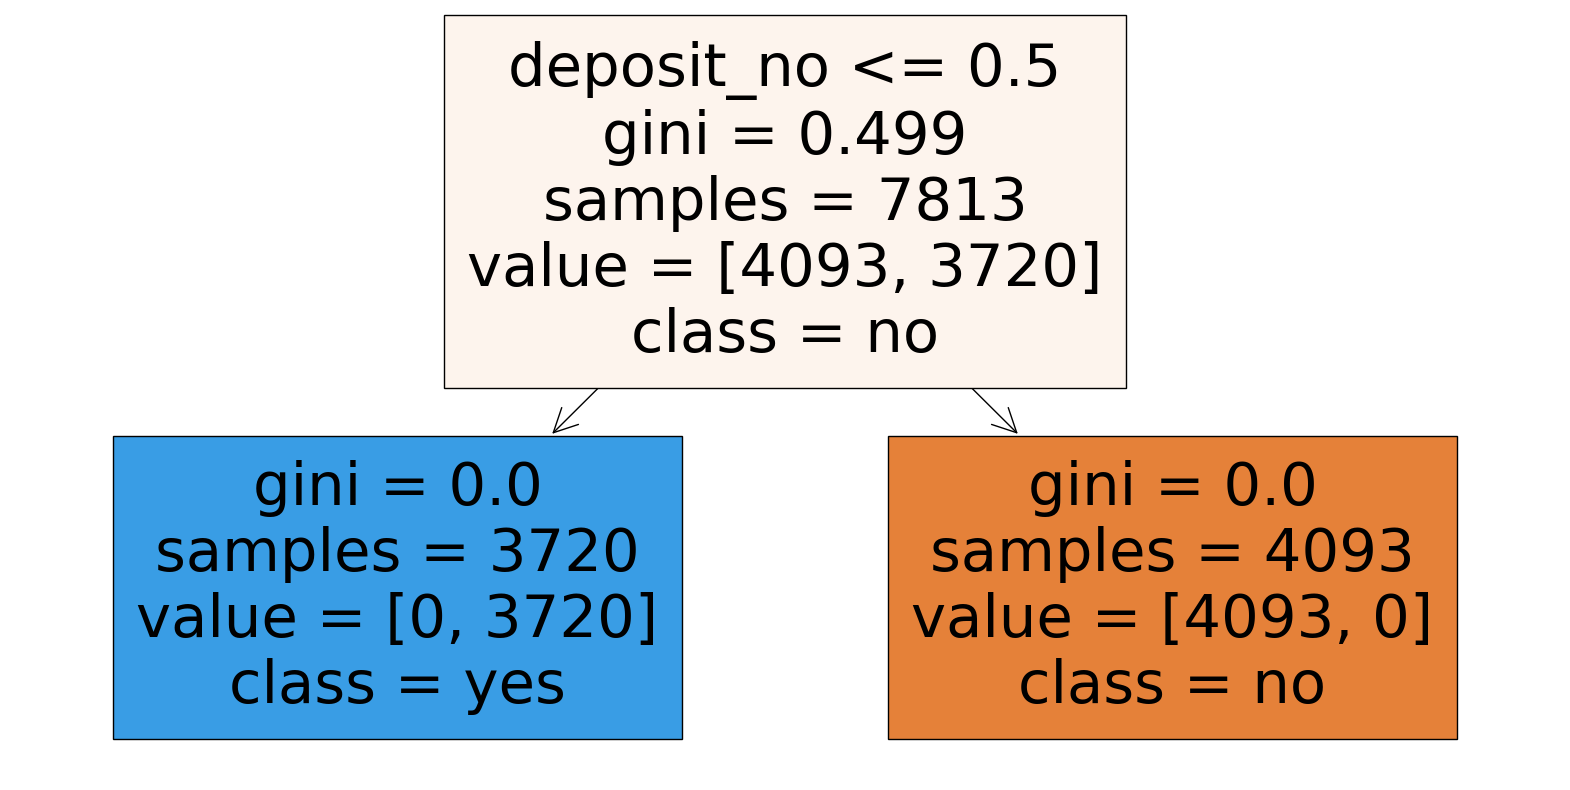

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decisiontree, filled=True, feature_names=feature.columns, class_names=['no', 'yes'])
plt.show()